# Exploración de la información

In [118]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [61]:
# Para cambiarnos de carpeta
os.chdir('/home/eugeniapch/desarrollo/pro_cienciad/')
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [12]:
compras_df = pd.read_csv('notebooks/data/clean_compras.csv')
compras_df.head()

,NUM BEN,BENEFICIARIO,RFC,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET
0,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS AF8458-158008-3972,OT. 20204373,REEMPLAZO E INSTALACION DE AMORTIGUADORES (DEL...,TR,1019110.0,2020-12-11,14911.80,GASTOS VARIOS
1,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF6916-158008-4041,OT. 20204425,REEMPLAZO E INSTALACION DE OCHO BIRLOS Y NUEVE...,TR,1019110.0,2020-12-11,2528.80,GASTOS VARIOS
2,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF6917-158008-3975,OT. 20204376,REEMPLAZO DE DOS RINES (17). PATRIMONIO 80383...,TR,1019110.0,2020-12-11,8500.02,GASTOS VARIOS
3,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF7004-158008-3971,OT. 20204374,REEMPLAZO DE DOS RINES (14). PATRIMONIO 8007...,TR,1019110.0,2020-12-11,2400.01,GASTOS VARIOS
4,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF7137-158008-4554,OT. 20205130,REEMPLAZO E INSTALACION DE RIN 14. PATRIMONIO ...,TR,299001496.0,2020-12-23,1537.00,GASTOS VARIOS


## Pasos siguientes
### 1.) Visión general del DataSet

Vamos a iniciar conociendo que columnas de datos tenemos.

In [15]:
#Columnas que contiene el dataset
compras_df.columns

Index(['NUM BEN', 'BENEFICIARIO', 'RFC', 'FACTURA', 'CONTRATO', 'CONCEPTO',
       'TIPO', '# OP', 'FECHA', 'IMPORTE', 'SHEET'],
      dtype='object')

In [16]:
# El tipo de datos de cada columna
compras_df.dtypes

NUM BEN           int64
BENEFICIARIO     object
RFC              object
FACTURA          object
CONTRATO         object
CONCEPTO         object
TIPO             object
# OP            float64
FECHA            object
IMPORTE         float64
SHEET            object
dtype: object

Vemos que la fecha se cargo como archivo de texto y no con formato de fecha. Esto se debe a que el formato csv no tiene muchos metadatos.

In [60]:
# Vamos a analizar los valores de las columnas que son numericas
compras_df.describe()

,# OP,IMPORTE
count,1540.00000,1540.00000
mean,192004995.52403,626317.94734
std,141118858.42122,4666911.95162
min,1019042.00000,0.86000
25%,1019144.00000,2987.00000
50%,298000040.00000,12355.84000
75%,300000114.25000,113058.33500
max,604000051.00000,126730290.65000


Podemos tomar la decisión de agrupar columnas de ser necesario y definir cuales son las que vamos a necesitar para trabajar nuestro conjunto de datos.

In [21]:
compras_df = compras_df[['BENEFICIARIO','FACTURA','CONTRATO','CONCEPTO','TIPO','# OP','FECHA','IMPORTE','SHEET']]

### 2.) Análisis unidimensional de las variables

Cuando trabajamos con variables categóricas lo mas facil es encontrar el conteo de la ocurrencia de una variable y de un valor.

In [23]:
#cantidad de observacioes por hoja
compras_df['SHEET'].value_counts()

CONTRATISTAS Y FDO FED    724
GASTOS VARIOS             690
COMUNICACION               71
SERV. PERS.                46
SERV PPROF                  9
Name: SHEET, dtype: int64

In [24]:
# Conocer la cantidad de conceptos con los que estamos trabajando
compras_df['CONCEPTO'].value_counts()

SERVICIOS FUNERARIOS ASISTENCIA SOCIAL DIF                                                                                                                    27
SERVICIO DE CONFINAMIENTO DE RESIDUOS SOLIDOS DEL MUNICIPIO DE MONTERREY DEL PERIODO DE 30 AL 31 DE OCTUBRE DE 2020.                                          11
SERVICIO DE CONFINAMIENTO DE RESIDUOS SOLIDOS DEL MUNICIPIO DE MONTERREY DEL PERIODO DE 19 AL 29 DE OCTUBRE DE 2020.                                          11
INICIO FONDO DE MORRALLA PARA EL OPERATIVO DE PREDIAL 2021 RECAUDACION INMOBILIARIA                                                                           10
FONDO OPERATIVO NOVIEMBRE 2020                                                                                                                                10
                                                                                                                                                              ..
REEMPLAZO E INSTALACION DE ACEITE,

In [28]:
# Cantidad de pagos que ha hecho cada proveedor
# Extraemos los primeros 10
compras_df['BENEFICIARIO'].value_counts()[0:10]

CAMARA MEXICANA DE LA INDUSTRIA DE LA CONSTRUCCION    266
AUTOKAM REGIOMONTANA,S.A.DE C.V.                      101
CAR ONE MONTERREY, S.A. DE C.V.                        78
PEREZ RIOS RAMIRO                                      58
S.I.M.E.P.R.O.D.E.                                     50
INTERASFALTOS, S.A. DE C.V.                            45
GRUPO COYOTE MONTERREY, S.A. DE C.V.                   43
SERVICIO TECNICO CHURUBUSCO, S.A. DE C.V.              30
CFE SUMINISTRADOR DE SERVICIOS BASICOS                 29
CORDERO MACIAS SILVESTRE GUADALUPE                     27
Name: BENEFICIARIO, dtype: int64

Para el análisis numérico podemos usar:

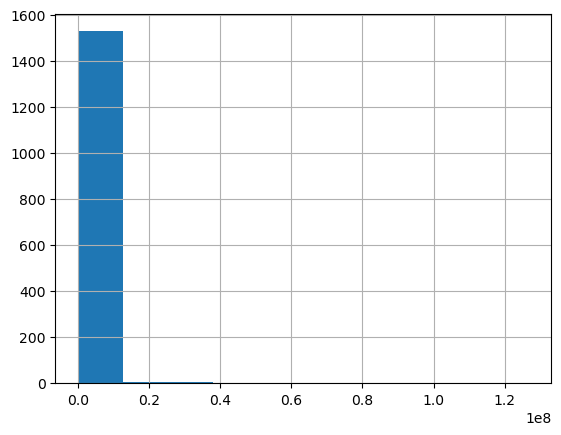

In [33]:
# Nos muestra cientos de millones
compras_df['IMPORTE'].hist();

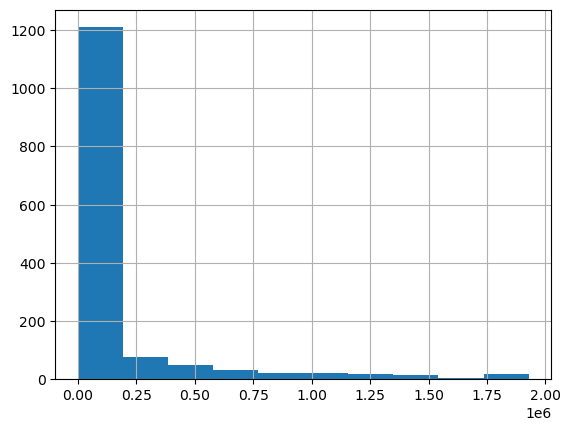

In [34]:
# Esto nos muestra cientos de miles
compras_df[compras_df['IMPORTE'] < compras_df['IMPORTE'].quantile(0.95)]['IMPORTE'].hist();

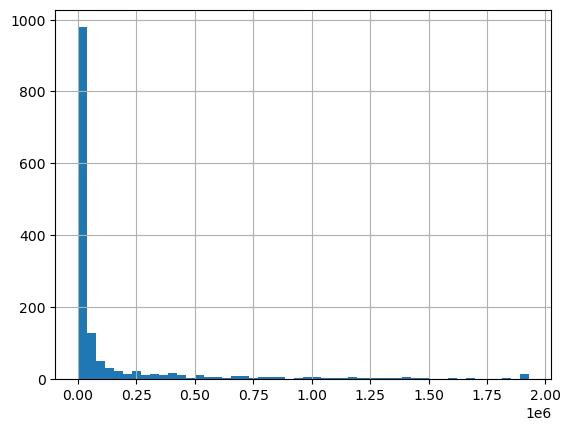

In [35]:
compras_df[compras_df['IMPORTE'] < compras_df['IMPORTE'].quantile(0.95)]['IMPORTE'].hist(bins=50);

In [41]:
# Para todos los gastos
df_filtro_c = compras_df[compras_df['IMPORTE'] < compras_df['IMPORTE'].quantile(0.95)].head(5);
df_filtro_c

,BENEFICIARIO,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET
0,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS AF8458-158008-3972,OT. 20204373,REEMPLAZO E INSTALACION DE AMORTIGUADORES (DEL...,TR,1019110.0,2020-12-11,14911.80,GASTOS VARIOS
1,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF6916-158008-4041,OT. 20204425,REEMPLAZO E INSTALACION DE OCHO BIRLOS Y NUEVE...,TR,1019110.0,2020-12-11,2528.80,GASTOS VARIOS
2,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF6917-158008-3975,OT. 20204376,REEMPLAZO DE DOS RINES (17). PATRIMONIO 80383...,TR,1019110.0,2020-12-11,8500.02,GASTOS VARIOS
3,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF7004-158008-3971,OT. 20204374,REEMPLAZO DE DOS RINES (14). PATRIMONIO 8007...,TR,1019110.0,2020-12-11,2400.01,GASTOS VARIOS
4,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF7137-158008-4554,OT. 20205130,REEMPLAZO E INSTALACION DE RIN 14. PATRIMONIO ...,TR,299001496.0,2020-12-23,1537.00,GASTOS VARIOS


### 3.) Análisis multidimensional de las variables

In [44]:
# Montos facturados por beneficiario
sum_importe_benefic = compras_df.groupby('BENEFICIARIO').sum()['IMPORTE']
sum_importe_benefic

BENEFICIARIO
235 PROYECTOS, S.A. DE C.V.                   1649292.36
ABC Y CONSTRUCCIONES, SA. DE CV.              1311087.90
ACEROS Y OVEROLLINGS DE MEXICO, SA. DE CV.       5914.30
ADQUISICIONES INTELIGENTES, S.A. DE C.V.      2132196.00
ALIANZA AUTOMOTRIZ RIVERO, SA. DE CV.          450859.52
                                                 ...    
VILLARREAL CARDENAS JUAN IGNACIO                 3733.13
VILLARREAL CARDENAS NANCY ESTHER                81461.14
VILLARREAL DE LEON BERTHA                       11004.05
VIVERO EL ESCORIAL, S.A. DE C.V.              2511255.46
ZAPATA CHAVIRA HOMERO ARTURO                    28350.00
Name: IMPORTE, Length: 301, dtype: float64

In [62]:
sum_importe_benefic.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10]

,BENEFICIARIO,IMPORTE
187,MUNICIPIO DE LA CIUDAD DE MONTERREY,252723581.3400
151,INTEGRACION DE SISTEMAS DE AVANZADA TECNOLOGIA...,135610945.8200
287,"VALUE ARRENDADORA,S.A.DE C.V. SOFOM ER VALUE G...",43820561.0300
32,"CAR ONE MONTERREY, S.A. DE C.V.",30644313.8500
13,"BANCO BANCREA,S.A. ,FIDEICOMISO NUMERO BP417",30000000.0000
258,"SI VALE MEXICO, S.A. DE C.V.",26003844.6900
153,"INTERASFALTOS, S.A. DE C.V.",24046465.4200
227,"RED RECOLECTOR, S.A. DE C.V.",19512669.8600
255,"SERVICIOS BROXEL, S.A.P.I. DE C.V.",19412718.2500
216,"PROYECTOS Y DESARROLLOS SALVE, SA. DE CV.",18880026.6700


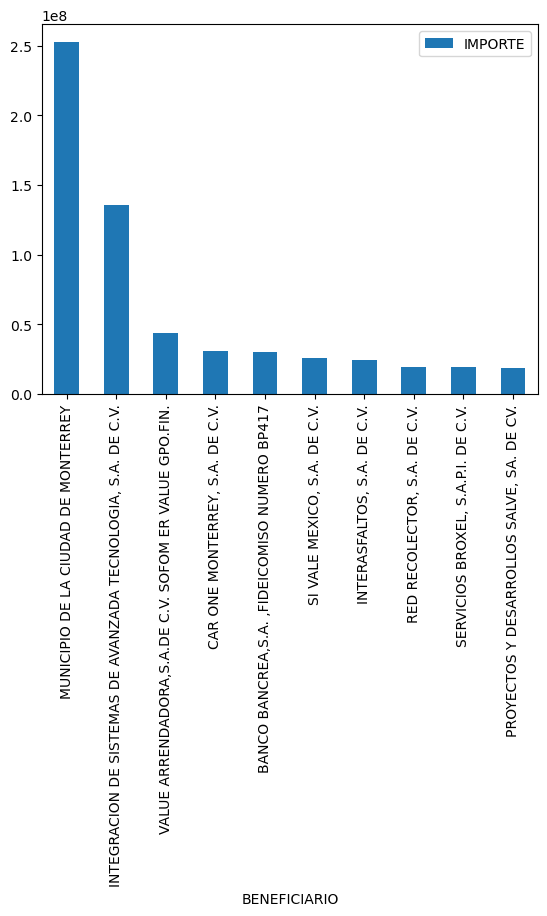

In [47]:
# Graficando
sum_importe_benefic.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10].plot(kind='bar', x='BENEFICIARIO', y= 'IMPORTE');

In [63]:
#Gasto promedio por hoja (tipo de actividad se le paga mas dinero)
prom_importe_activ = compras_df.groupby('SHEET').mean()['IMPORTE']
prom_importe_activ

SHEET
COMUNICACION             109705.3437
CONTRATISTAS Y FDO FED   474566.7658
GASTOS VARIOS            881659.7318
SERV PPROF               229592.1667
SERV. PERS.               59623.4052
Name: IMPORTE, dtype: float64

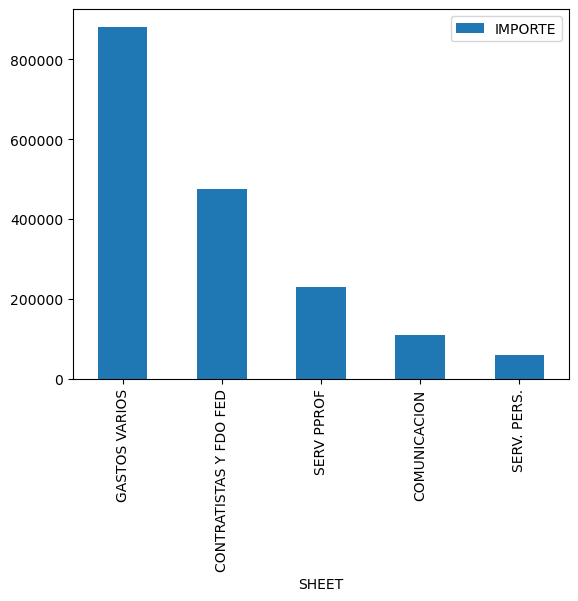

In [58]:
# Para traer el top 10 iloc[0:10]
prom_importe_activ.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10].plot(kind='bar', x='SHEET', y='IMPORTE');

In [67]:
#detalles de fechas y sus gastos
sum_imprt_fecha = compras_df.groupby(by='FECHA').sum('IMPORTE').sort_values(by='IMPORTE', ascending=False).iloc[0:10]
sum_imprt_fecha

,# OP,IMPORTE
FECHA,,
2020-12-17,1081106605.0000,173520476.4100
2020-12-18,57509912760.0000,156887547.3400
2020-12-08,917703844.0000,151982427.5300
2020-12-28,14223272396.0000,120476358.2200
2020-12-11,25592517237.0000,112752438.7000
2020-12-04,101675254431.0000,74322471.3400
2020-12-22,7815824419.0000,68148454.3300
2020-12-30,29604692420.0000,64358893.4700
2020-12-23,38049933801.0000,33285705.5600


In [72]:
#creando filtros
compras_gastos_df = compras_df[compras_df['SHEET'] == 'GASTOS VARIOS']
compras_gastos_df.head(5)

,BENEFICIARIO,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET
0,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS AF8458-158008-3972,OT. 20204373,REEMPLAZO E INSTALACION DE AMORTIGUADORES (DEL...,TR,1019110.0000,2020-12-11,14911.8000,GASTOS VARIOS
1,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF6916-158008-4041,OT. 20204425,REEMPLAZO E INSTALACION DE OCHO BIRLOS Y NUEVE...,TR,1019110.0000,2020-12-11,2528.8000,GASTOS VARIOS
2,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF6917-158008-3975,OT. 20204376,REEMPLAZO DE DOS RINES (17). PATRIMONIO 80383...,TR,1019110.0000,2020-12-11,8500.0200,GASTOS VARIOS
3,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF7004-158008-3971,OT. 20204374,REEMPLAZO DE DOS RINES (14). PATRIMONIO 8007...,TR,1019110.0000,2020-12-11,2400.0100,GASTOS VARIOS
4,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF7137-158008-4554,OT. 20205130,REEMPLAZO E INSTALACION DE RIN 14. PATRIMONIO ...,TR,299001496.0000,2020-12-23,1537.0000,GASTOS VARIOS


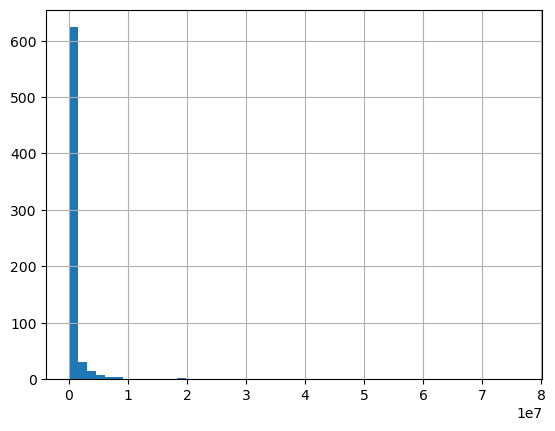

In [75]:
compras_gastos_df['IMPORTE'].hist(bins=50);

In [82]:
#Cuando el beneficiario es la ciudad de monterrey
compras_gastos_df[compras_gastos_df['BENEFICIARIO'] == "MUNICIPIO DE LA CIUDAD DE MONTERREY"]['SHEET'].value_counts()

GASTOS VARIOS    11
Name: SHEET, dtype: int64

In [81]:
#Si lo hacemos del dataset en general tenemos
compras_df[compras_df['BENEFICIARIO'] == "MUNICIPIO DE LA CIUDAD DE MONTERREY"]['SHEET'].value_counts()

GASTOS VARIOS             11
CONTRATISTAS Y FDO FED     5
Name: SHEET, dtype: int64

In [85]:
#Usando dos variables
compras_df.groupby(['BENEFICIARIO','SHEET']).sum('IMPORTE')

,,# OP,IMPORTE
BENEFICIARIO,SHEET,,
"235 PROYECTOS, S.A. DE C.V.",GASTOS VARIOS,598003008.0000,1649292.3600
"ABC Y CONSTRUCCIONES, SA. DE CV.",CONTRATISTAS Y FDO FED,1012000418.0000,1311087.9000
"ACEROS Y OVEROLLINGS DE MEXICO, SA. DE CV.",GASTOS VARIOS,1104599.0000,5914.3000
"ADQUISICIONES INTELIGENTES, S.A. DE C.V.",CONTRATISTAS Y FDO FED,602000076.0000,2132196.0000
"ALIANZA AUTOMOTRIZ RIVERO, SA. DE CV.",GASTOS VARIOS,299000195.0000,450859.5200
...,...,...,...
VILLARREAL CARDENAS JUAN IGNACIO,SERV. PERS.,299000164.0000,3733.1300
VILLARREAL CARDENAS NANCY ESTHER,SERV. PERS.,300104730.0000,81461.1400
VILLARREAL DE LEON BERTHA,GASTOS VARIOS,1104610.0000,11004.0500


In [89]:
compras_sheet_benef = compras_df.groupby(['BENEFICIARIO','SHEET']).sum()['IMPORTE'].sort_values().unstack('SHEET')
compras_sheet_benef

SHEET,COMUNICACION,CONTRATISTAS Y FDO FED,GASTOS VARIOS,SERV PPROF,SERV. PERS.
BENEFICIARIO,,,,,
"235 PROYECTOS, S.A. DE C.V.",NaN,NaN,1649292.3600,NaN,NaN
"ABC Y CONSTRUCCIONES, SA. DE CV.",NaN,1311087.9000,NaN,NaN,NaN
"ACEROS Y OVEROLLINGS DE MEXICO, SA. DE CV.",NaN,NaN,5914.3000,NaN,NaN
"ADQUISICIONES INTELIGENTES, S.A. DE C.V.",NaN,2132196.0000,NaN,NaN,NaN
"ALIANZA AUTOMOTRIZ RIVERO, SA. DE CV.",NaN,NaN,450859.5200,NaN,NaN
...,...,...,...,...,...
VILLARREAL CARDENAS JUAN IGNACIO,NaN,NaN,NaN,NaN,3733.1300
VILLARREAL CARDENAS NANCY ESTHER,NaN,NaN,NaN,NaN,81461.1400
VILLARREAL DE LEON BERTHA,NaN,NaN,11004.0500,NaN,NaN


In [94]:
top_beneficiarios = compras_df.groupby('BENEFICIARIO')['IMPORTE'].sum().sort_values(ascending=False).index[0:10]
compras_sheet_benef.loc[top_beneficiarios]

SHEET,COMUNICACION,CONTRATISTAS Y FDO FED,GASTOS VARIOS,SERV PPROF,SERV. PERS.
BENEFICIARIO,,,,,
MUNICIPIO DE LA CIUDAD DE MONTERREY,NaN,34125.0000,252689456.3400,NaN,NaN
"INTEGRACION DE SISTEMAS DE AVANZADA TECNOLOGIA, S.A. DE C.V.",NaN,128117905.8500,7493039.9700,NaN,NaN
"VALUE ARRENDADORA,S.A.DE C.V. SOFOM ER VALUE GPO.FIN.",NaN,NaN,43820561.0300,NaN,NaN
"CAR ONE MONTERREY, S.A. DE C.V.",NaN,22297641.5000,8346672.3500,NaN,NaN
"BANCO BANCREA,S.A. ,FIDEICOMISO NUMERO BP417",NaN,NaN,30000000.0000,NaN,NaN
"SI VALE MEXICO, S.A. DE C.V.",NaN,NaN,26003844.6900,NaN,NaN
"INTERASFALTOS, S.A. DE C.V.",NaN,NaN,24046465.4200,NaN,NaN
"RED RECOLECTOR, S.A. DE C.V.",NaN,19512669.8600,NaN,NaN,NaN
"SERVICIOS BROXEL, S.A.P.I. DE C.V.",NaN,NaN,19412718.2500,NaN,NaN


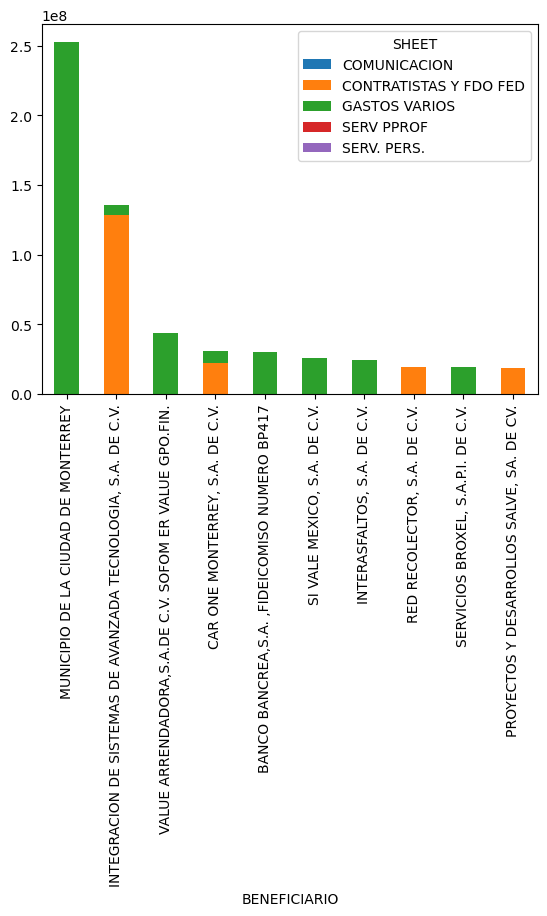

In [96]:
compras_sheet_benef.loc[top_beneficiarios].plot.bar(stacked=True);

### Análisis de texto

Análisis de nubes de palabras que nos permite ver de que se esta hablando en un texto.

In [101]:
import nltk
from nltk.corpus import stopwords

In [107]:
# nltk.download() #descargamos el archivo
#stopwords.words('spanish') #conocemos cuales son las stopwords del espaol

Las stopwords, no dan mucho valor. lo que hacen es darnos una noción de las cosas que sirven para unificar las palabras o frases.

In [114]:
textos_compras = ''
for row in compras_df['CONCEPTO']: 
    textos_compras =  textos_compras + ' ' + row

In [116]:
# agregamos otras palabras que queremos ignorar
stopwords_list = stopwords.words('spanish') +  ['2020', 'cont', 'millar', 'dpp', 'est', 'op', 'ret', 'mty', 'icom']

In [126]:
#eliminando las stopwords_list
textos_compras = ' '.join([x for x in textos_compras.strip().lower().split(' ') if x not in stopwords_list and len(x)>4])

In [122]:
from wordcloud import WordCloud

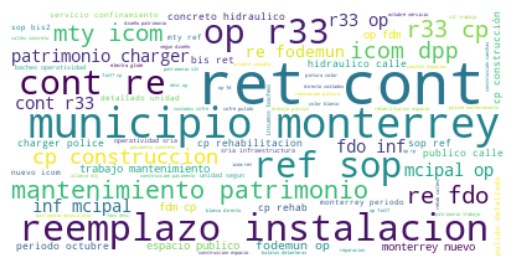

In [127]:
wc = WordCloud(background_color= 'white')
wc.generate(textos_compras)

plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()